# Data exploration from drive
After we have trained the car, we need to load the data saved to the notebook.

## Importing data recorded from simulator

In [1]:
import pandas as pd
import numpy as np

# Open the training "datafile" 
df = pd.read_csv('./my_data/driving_log.csv', header=None,
                 names=['center_img', 'left_img', 'right_img', 'steering','throttle','brake','speed'])

print("Number of frames saved (center):", df.size)

# Show the first lines of the CSV file
df.head()

Number of frames saved (center): 24157


,center_img,left_img,right_img,steering,throttle,brake,speed
0,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,-0.085714,0.0,0,29.27872
1,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,-0.085714,0.0,0,29.04254
2,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,-0.075000,0.0,0,28.80865
3,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,-0.050000,0.0,0,28.63523
4,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,/media/puma/bigdisk/udacity/carnd/CarND-Behavi...,0.010714,0.0,0,28.40466


Let's pick some images saved during the training drive


In [2]:
### Import file names
center_my_frame_path = df['center_img']
left_my_frame_path = df['left_img']
right_my_frame_path = df['right_img']

steering = df['steering'].astype(np.float32)


# Load image and 
import cv2
def load_image_and_append(img_path_list):
    img_list = []
    for img_path in img_path_list:
        img_bgr = cv2.imread(img_path)
        img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
        img_list.append(img)
    return img_list
    
center_my_frames = load_image_and_append(center_my_frame_path)
left_my_frames = load_image_and_append(left_my_frame_path)
right_my_frames = load_image_and_append(right_my_frame_path)



Images left vector dimension: 3451
Images center vector dimension: 3451
Images right vector dimension: 3451


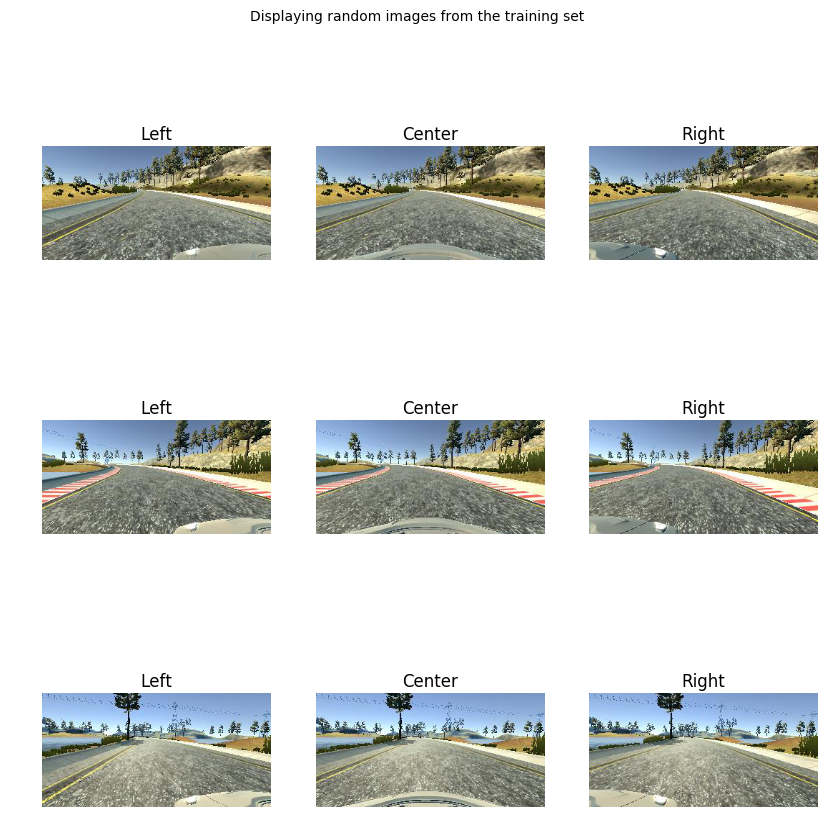

In [3]:
print('Images left vector dimension:', len(left_my_frames) )
print('Images center vector dimension:', len(center_my_frames) )
print('Images right vector dimension:', len(right_my_frames) )

### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

# Displaying random images from the training set
plt.figure(figsize=(10,10))
plot_number = 0
number_subplots = 3

for plot_number in range(number_subplots):
    plt.subplot(number_subplots, 3, plot_number*3+1)
    image = left_my_frames[plot_number*100]
    plt.axis('off')
    plt.title('Left')
    plt.imshow(image)
    
    plt.subplot(number_subplots, 3, plot_number*3+2)
    image = center_my_frames[plot_number*100]
    plt.axis('off')
    plt.title('Center')
    plt.imshow(image)
    
    plt.subplot(number_subplots, 3, plot_number*3+3)
    image = right_my_frames[plot_number*100]
    plt.title('Right')
    plt.axis('off')
    plt.imshow(image)
    
plt.suptitle('Displaying random images from the training set')
plt.show()


### What is the distribution of the steering data

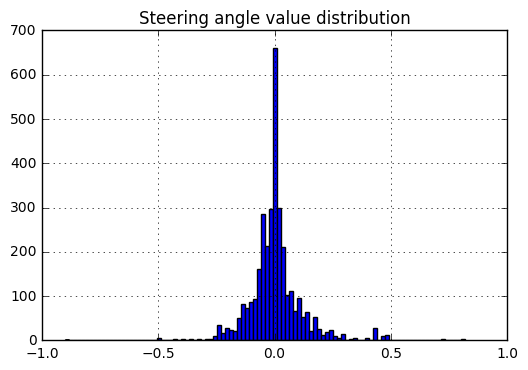

Mean 0.0024547725915908813


In [4]:
# Histogram for steering angle value distribution whole training set
bins = 100
plt.hist(steering, bins, color='blue'  )
plt.grid('on')
plt.title('Steering angle value distribution')
plt.show()
print('Mean', np.mean(steering))

In [5]:
# Cutoff steering angle value to drop some images where the vehicle drives straights
cutoff = 0.01


indices_zero_steer = steering[np.abs(steering)<cutoff].index

print('Number of images under cutoff:', steering[indices_zero_steer].shape)
print('Percentage of images under cutoff:', steering[indices_zero_steer].shape[0]/steering.shape[0])

indices_zero_steer_delete = indices_zero_steer[(np.int32(indices_zero_steer)%2)==0]

print('Size of number of steering images to drop (even indices):', indices_zero_steer_delete.shape)

Number of images under cutoff: (778,)
Percentage of images under cutoff: 0.22544190089829036
Size of number of steering images to drop (even indices): (388,)


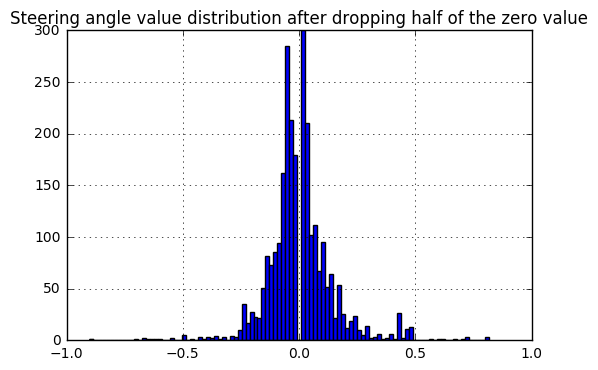

Mean 0.0033496106043457985


In [6]:
# Removing half of the steering values
bins = 100
plt.hist(steering.drop(indices_zero_steer), bins, color='blue')
plt.grid('on')
plt.title('Steering angle value distribution after dropping half of the zero value')
plt.show()

print('Mean', np.mean(steering.drop(indices_zero_steer)))

In [7]:
# Remove zero steering images from training dataset
for i in sorted(indices_zero_steer, reverse=True):
    del center_my_frames[i]
    
X_train_list = center_my_frames
less_zero_steering = steering.drop(indices_zero_steer).astype(np.float32)
y_train_list = less_zero_steering.values.tolist()

In [8]:
print(len(X_train_list))
print(len(y_train_list))

2673
2673


## Adding left and right video stream

In [9]:
print('Training size with just center video stream:', len(X_train_list))
print('Training size of the angles:', len(y_train_list))

augmented_steering_bias = 0.50
# Add left
for i in sorted(indices_zero_steer, reverse=True):
    del left_my_frames[i]
X_train_list.extend(left_my_frames)
y_train_list.extend( (np.array(less_zero_steering) + augmented_steering_bias).tolist() )

print('Training size with left video stream:', len(X_train_list))
print('Training size of the angles:', len(y_train_list))

# Add right
for i in sorted(indices_zero_steer, reverse=True):
    del right_my_frames[i]
X_train_list.extend(right_my_frames)
y_train_list.extend( (np.array(less_zero_steering) - augmented_steering_bias).tolist() )

print('Total training size with left, center and right video stream:', len(X_train_list))
print('Training size of the angles:', len(y_train_list))

Training size with just center video stream: 2673
Training size of the angles: 2673
Training size with left video stream: 5346
Training size of the angles: 5346
Total training size with left, center and right video stream: 8019
Training size of the angles: 8019


### Flipping images

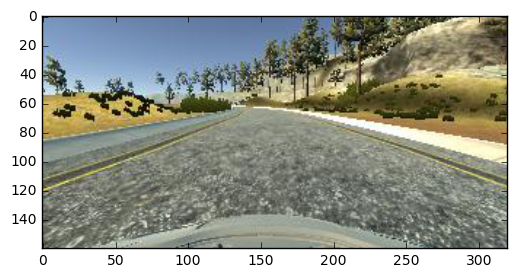

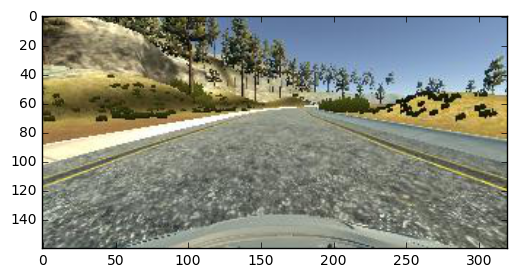

In [10]:
plt.imshow(X_train_list[0])
plt.show()
plt.imshow(cv2.flip(X_train_list[0],1))
plt.show()

In [11]:
# Mirror images
X_train_list_mirror = []
X_train_list_len = len(X_train_list)
X_train_list_copy = X_train_list.copy()
y_train_list_copy = y_train_list.copy()
for i in range(X_train_list_len):
    X_train_list.append(cv2.flip(X_train_list_copy[i],1))
    y_train_list.append(y_train_list_copy[i] * -1.0)

del X_train_list_copy
del y_train_list_copy

In [12]:
# Clear temp variable
#del X_train_list[-1]
del left_my_frames
del right_my_frames
del center_my_frames

## Dataset is now constructed, converting the training data to tensors

In [ ]:
# Construct tensor from list
X_train = np.array(X_train_list)
del X_train_list
y_train = np.array(y_train_list)

del y_train_list



## Robustness improvement over the drive (a novel idea?)
Having observed that my training dataset is quiet low compared to the dataset provided by Udacity, I was interested in finding a way to improve the robustness of the neural network in a minimal way.

A simple idea is to imagine that the road is a potential field on which the car navigates. This concept is well illustrated on this student video : https://www.youtube.com/watch?v=JT8w94n1kWw

In order to maintain the car in the center of the road we need to make sure that the potential field sharply increases when the vehicle is closer to the sides of the road or its orientation is not towards the center of the road.
With our dataset, the easiest way to artificially increase this field gradient is to increase the steering values in the training dataset by muliplying it by a constant factor (or a gain as called in Control Theory).

By appying a gain to the steering dataset the vehicle steers more steering more agressively when approaching dangerously.

In [ ]:
## Use a gain of 1.5 to increase agressitivity 
y_train = y_train * 1.5

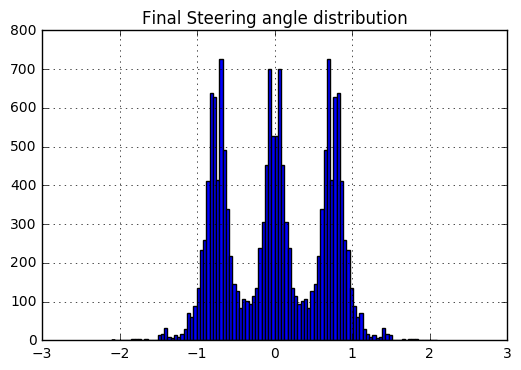

In [14]:
# Displaying final steering distribution
bins = 100
plt.hist(y_train, bins, color='blue')
plt.grid('on')
plt.title('Final Steering angle distribution')
plt.show()

# Construct Neural Net Architecture

In [15]:
# Build a model
from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation, Flatten, Dropout, Lambda
from keras.layers import Input
from keras.activations import relu, softmax
from keras.layers.convolutional import Convolution2D, Cropping2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.engine.topology import Merge, merge

model_input = Input(shape=(160, 320, 3))
model_stem = model_input
model_stem = Lambda(lambda x: (x-128.0)/255.0, input_shape=model_stem.get_shape()[1:]) (model_stem)
model_stem = Cropping2D(cropping=((60,20),(0,0)), input_shape=model_stem.get_shape()[1:]) (model_stem)
model_stem = Convolution2D(16, 3, 3, border_mode='valid', subsample=(2, 2))(model_stem)
model_stem = MaxPooling2D(pool_size=(2, 2), strides=None, border_mode='same') (model_stem)
branch_input = Activation('elu')(model_stem)

branch_input = BatchNormalization(epsilon=0.001, mode=0, axis=3, momentum=0.9) (branch_input)

left_branch = Convolution2D(32, 1 , 1,border_mode='same')(branch_input)

right_branch = Convolution2D(32, 7, 1, border_mode='same')  (branch_input)
right_branch = Activation('elu') (right_branch)
right_branch = Convolution2D(32, 1, 7, border_mode='same') (right_branch)
right_branch = BatchNormalization(epsilon=0.001, mode=0, axis=3, momentum=0.9) (right_branch)
right_branch = Activation('elu') (right_branch)

merged = merge([left_branch, right_branch], mode='sum') 

merged = Convolution2D(32, 3, 3, border_mode='valid', activation='elu', subsample=(2, 2))(merged)
merged = Convolution2D(64, 3, 3, border_mode='valid', activation='elu',  subsample=(2, 2))(merged)
merged = BatchNormalization(epsilon=0.001, mode=0, axis=-1, momentum=0.9)(merged)
merged = Flatten()(merged)
merged = Dropout(0.5)(merged)
merged = Dense(128, activation='elu')(merged)
merged = Dense(48)(merged)
merged = Dense(1)(merged)


# Compile and train the model
model =  Model(input=model_input, output=merged) 
model.compile(loss='mean_squared_error', optimizer='adam')


Using TensorFlow backend.


In [16]:
# Display the model
print(model.summary())

from keras.utils.visualize_util import plot
plot(model, to_file='model.png', show_shapes=True)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 160, 320, 3)   0                                            
____________________________________________________________________________________________________
lambda_1 (Lambda)                (None, 160, 320, 3)   0           input_1[0][0]                    
____________________________________________________________________________________________________
cropping2d_1 (Cropping2D)        (None, 80, 320, 3)    0           lambda_1[0][0]                   
____________________________________________________________________________________________________
convolution2d_1 (Convolution2D)  (None, 39, 159, 16)   448         cropping2d_1[0][0]               
___________________________________________________________________________________________

<img src="model.png" alt="Model"/>

In [17]:
# Shuffle the data before performing validation split
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

# Train the model
# History is a record of training loss and metrics
history = model.fit(X_train, y_train, batch_size=128, nb_epoch=20, validation_split=0.1, shuffle=True)



Train on 14434 samples, validate on 1604 samples
Epoch 1/20
14434/14434 [==============================] - 12s - loss: 1.6261 - val_loss: 0.1974
Epoch 2/20
14434/14434 [==============================] - 10s - loss: 0.1530 - val_loss: 0.0708
Epoch 3/20
14434/14434 [==============================] - 10s - loss: 0.0785 - val_loss: 0.0513
Epoch 4/20
14434/14434 [==============================] - 10s - loss: 0.0562 - val_loss: 0.0365
Epoch 5/20
14434/14434 [==============================] - 10s - loss: 0.0456 - val_loss: 0.0333
Epoch 6/20
14434/14434 [==============================] - 10s - loss: 0.0395 - val_loss: 0.0291
Epoch 7/20
14434/14434 [==============================] - 10s - loss: 0.0348 - val_loss: 0.0272
Epoch 8/20
14434/14434 [==============================] - 10s - loss: 0.0308 - val_loss: 0.0298
Epoch 9/20
14434/14434 [==============================] - 10s - loss: 0.0278 - val_loss: 0.0222
Epoch 10/20
14434/14434 [==============================] - 10s - loss: 0.0258 - val_los

In [18]:
# Calculate test score
#test_score = model.evaluate(X_train, y_train)
#print(test_score)

import os
import os.path

#if os.path.isfile(model_file):
#    os.remove("model.h5")

# save as YAML
model_yaml_string = model.to_yaml()
#print(model_yaml_string)

import pickle
pickle.dump( model_yaml_string, open( 'model_yaml_string.p', 'wb' ) )
print('Pickled model architecture (YAML) in the following file: model_yaml_string.p')

model.save_weights('my_model_weights.h5')
print('Save trained model weights in the following file: my_model_weights.h5')

    